Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 1_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:37:25 2025 +0200) (509.13ms elap...,0.299,0.0357,0.446,1.02,0.16,11.51,54.50 C,Nominal
1,(Sat Apr 5 07:37:25 2025 +0200) (507.97ms elap...,1.450,0.0744,0.503,2.17,0.37,27.90,54.50 C,Nominal
2,(Sat Apr 5 07:37:26 2025 +0200) (508.78ms elap...,0.262,0.0363,0.419,0.87,0.17,11.58,54.19 C,Nominal
3,(Sat Apr 5 07:37:26 2025 +0200) (508.78ms elap...,0.304,0.0362,0.426,0.92,0.18,12.38,54.19 C,Nominal
4,(Sat Apr 5 07:37:27 2025 +0200) (509.38ms elap...,0.288,0.0397,0.416,0.90,0.19,12.76,53.84 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(123, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:37:36 2025 +0200) (107.89ms elap...,36.0,0.0317,1.86,37.64,3.96,99.11,52.45 C,Nominal
1,(Sat Apr 5 07:37:36 2025 +0200) (104.89ms elap...,34.8,0.0518,1.36,36.18,3.98,99.51,52.45 C,Nominal
2,(Sat Apr 5 07:37:36 2025 +0200) (105.51ms elap...,37.8,0.0544,2.19,39.64,3.93,98.72,52.45 C,Nominal
3,(Sat Apr 5 07:37:36 2025 +0200) (104.50ms elap...,36.6,0.0660,2.08,38.08,3.99,99.80,52.45 C,Nominal
4,(Sat Apr 5 07:37:36 2025 +0200) (104.11ms elap...,37.9,0.0492,1.16,41.04,3.96,99.16,52.45 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:39:29 2025 +0200) (508.95ms elap...,0.2300,0.0000,0.267,0.45,0.07,5.18,54.88 C,Nominal
1,(Sat Apr 5 07:39:29 2025 +0200) (509.11ms elap...,1.1600,0.0318,0.347,1.52,0.24,20.59,54.88 C,Nominal
2,(Sat Apr 5 07:39:30 2025 +0200) (508.96ms elap...,0.0889,0.0000,0.260,0.25,0.05,2.86,54.84 C,Nominal
3,(Sat Apr 5 07:39:31 2025 +0200) (508.01ms elap...,0.0537,0.0000,0.258,0.23,0.03,2.20,54.84 C,Nominal
4,(Sat Apr 5 07:39:31 2025 +0200) (508.00ms elap...,0.0625,0.0000,0.272,0.25,0.04,2.73,54.79 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(87, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 07:39:40 2025 +0200) (108.98ms elap...,21.1,0.0,0.706,22.00,3.02,95.44,53.75 C,Nominal
1,(Sat Apr 5 07:39:40 2025 +0200) (104.77ms elap...,20.8,0.0,0.756,21.51,2.93,95.54,53.75 C,Nominal
2,(Sat Apr 5 07:39:40 2025 +0200) (105.64ms elap...,13.2,0.0,0.865,14.18,1.61,99.18,53.75 C,Nominal
3,(Sat Apr 5 07:39:40 2025 +0200) (106.27ms elap...,10.1,0.0,1.290,11.24,1.03,98.51,53.75 C,Nominal
4,(Sat Apr 5 07:39:40 2025 +0200) (106.61ms elap...,10.2,0.0,1.310,11.38,1.02,98.67,53.75 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:37:25,0.299,0.0357,0.446,1.02,0.16,11.51,54.50,Nominal,509.13
1,2025-04-05 07:37:25,1.450,0.0744,0.503,2.17,0.37,27.90,54.50,Nominal,507.97
2,2025-04-05 07:37:26,0.262,0.0363,0.419,0.87,0.17,11.58,54.19,Nominal,508.78
3,2025-04-05 07:37:26,0.304,0.0362,0.426,0.92,0.18,12.38,54.19,Nominal,508.78
4,2025-04-05 07:37:27,0.288,0.0397,0.416,0.90,0.19,12.76,53.84,Nominal,509.38


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(123, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:37:36,36.0,0.0317,1.86,37.64,3.96,99.11,52.45,Nominal,107.89
1,2025-04-05 07:37:36,34.8,0.0518,1.36,36.18,3.98,99.51,52.45,Nominal,104.89
2,2025-04-05 07:37:36,37.8,0.0544,2.19,39.64,3.93,98.72,52.45,Nominal,105.51
3,2025-04-05 07:37:36,36.6,0.0660,2.08,38.08,3.99,99.80,52.45,Nominal,104.50
4,2025-04-05 07:37:36,37.9,0.0492,1.16,41.04,3.96,99.16,52.45,Nominal,104.11


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:39:29,0.2300,0.0000,0.267,0.45,0.07,5.18,54.88,Nominal,508.95
1,2025-04-05 07:39:29,1.1600,0.0318,0.347,1.52,0.24,20.59,54.88,Nominal,509.11
2,2025-04-05 07:39:30,0.0889,0.0000,0.260,0.25,0.05,2.86,54.84,Nominal,508.96
3,2025-04-05 07:39:31,0.0537,0.0000,0.258,0.23,0.03,2.20,54.84,Nominal,508.01
4,2025-04-05 07:39:31,0.0625,0.0000,0.272,0.25,0.04,2.73,54.79,Nominal,508.00


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(87, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 07:39:40,21.1,0.0,0.706,22.00,3.02,95.44,53.75,Nominal,108.98
1,2025-04-05 07:39:40,20.8,0.0,0.756,21.51,2.93,95.54,53.75,Nominal,104.77
2,2025-04-05 07:39:40,13.2,0.0,0.865,14.18,1.61,99.18,53.75,Nominal,105.64
3,2025-04-05 07:39:40,10.1,0.0,1.290,11.24,1.03,98.51,53.75,Nominal,106.27
4,2025-04-05 07:39:40,10.2,0.0,1.310,11.38,1.02,98.67,53.75,Nominal,106.61


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


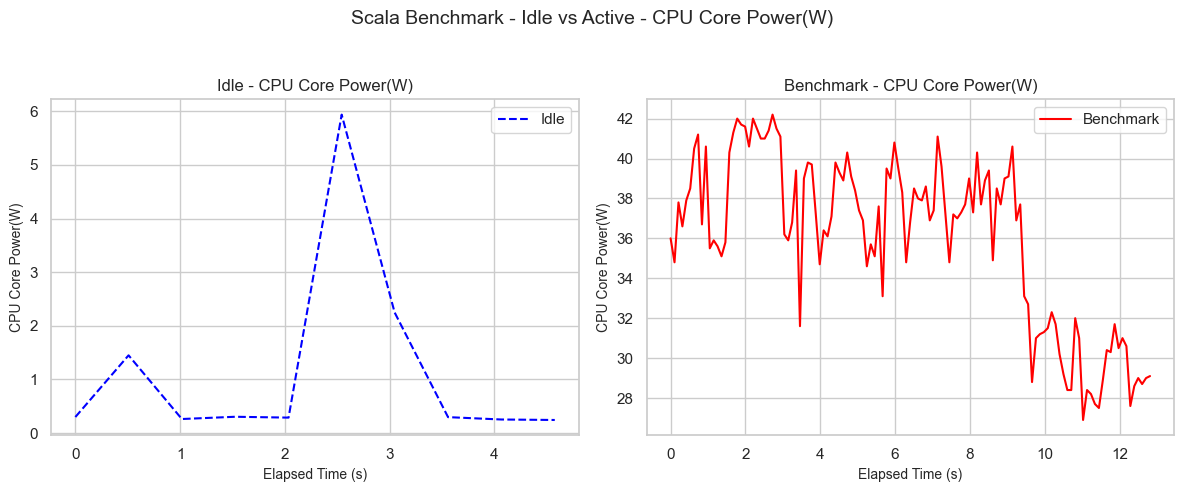

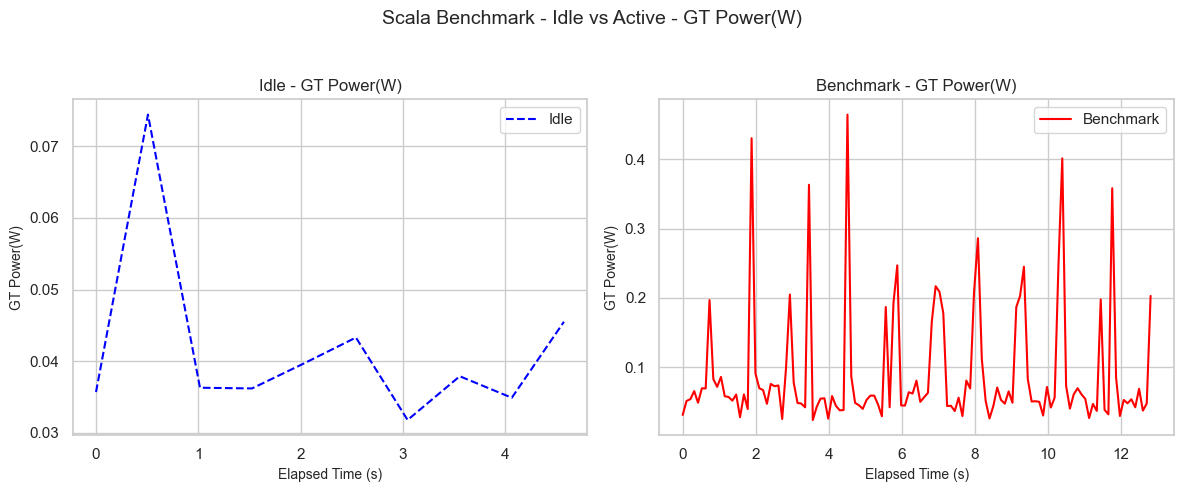

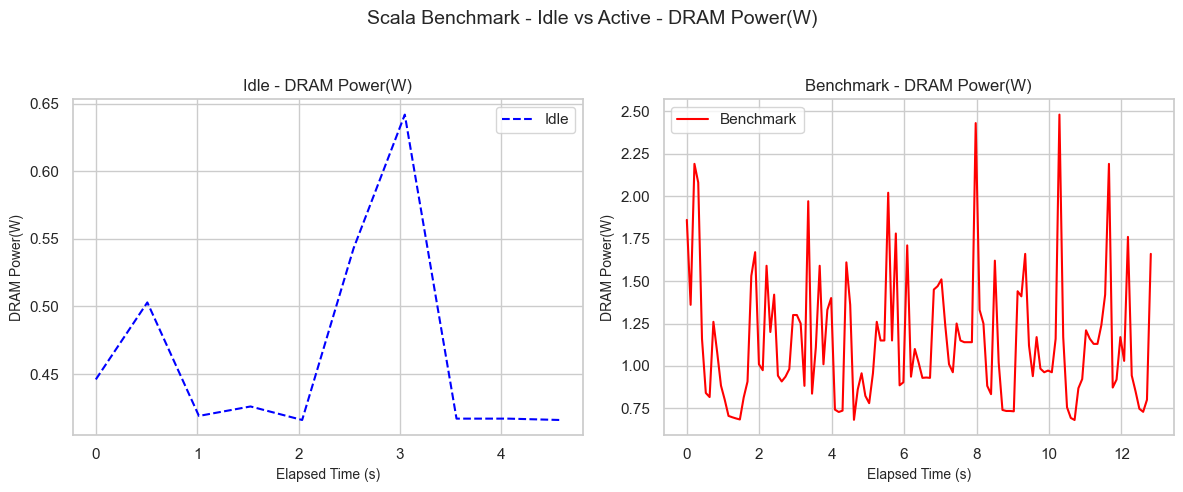

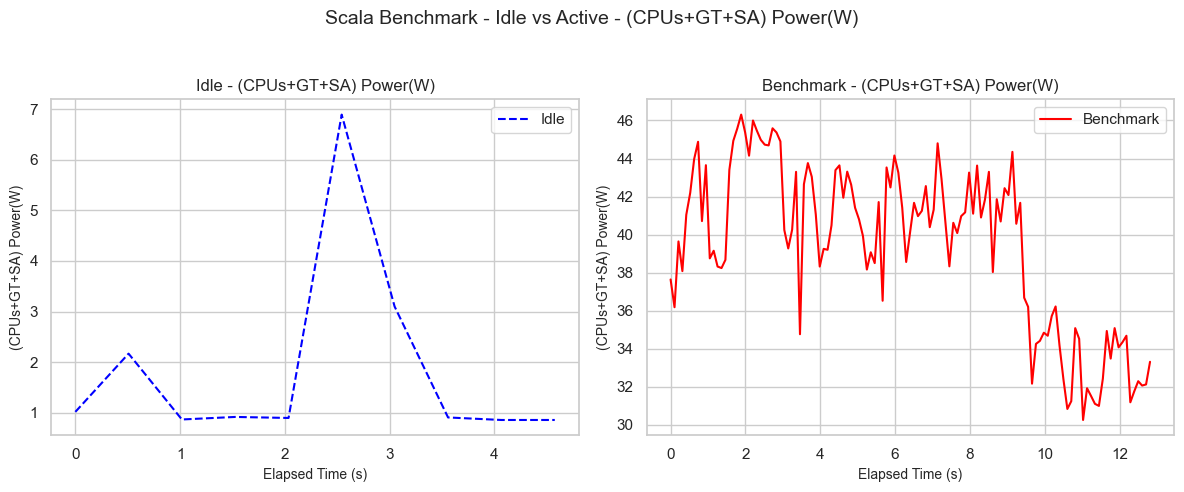

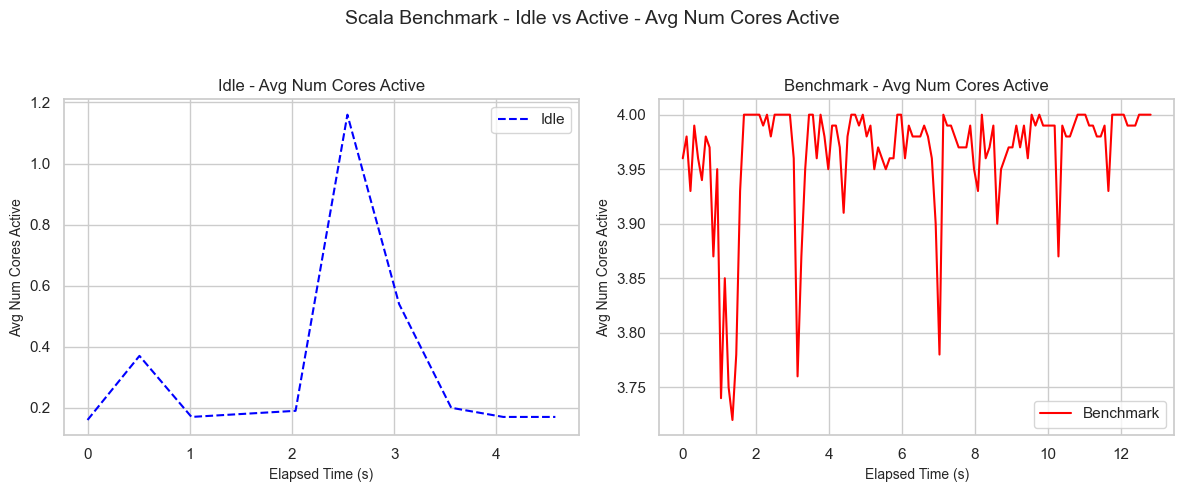

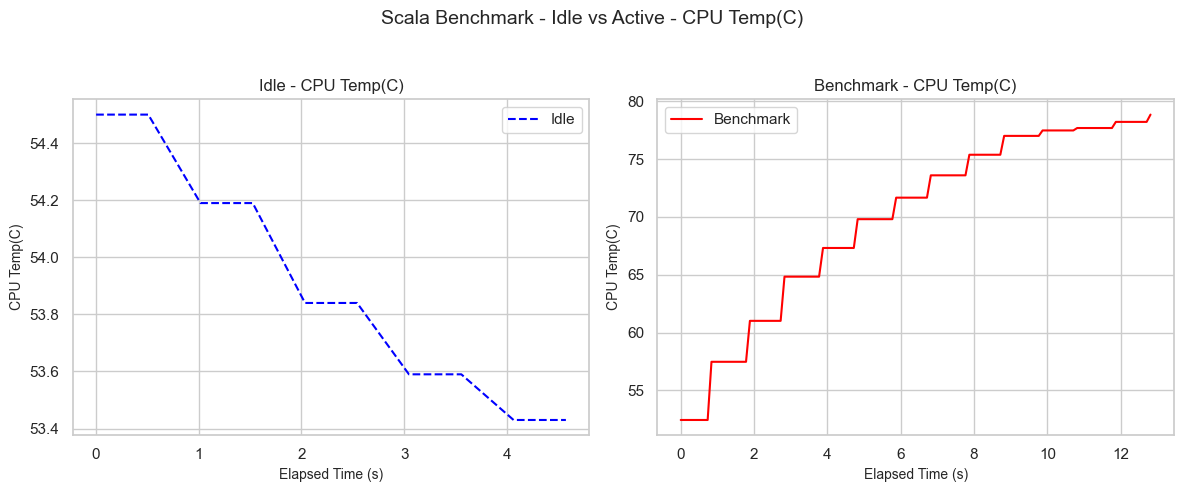

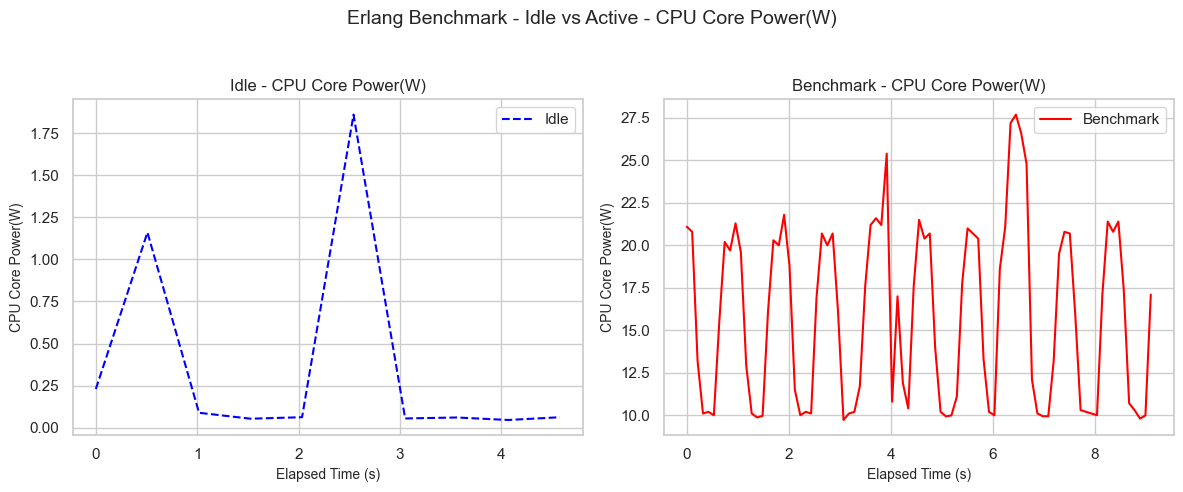

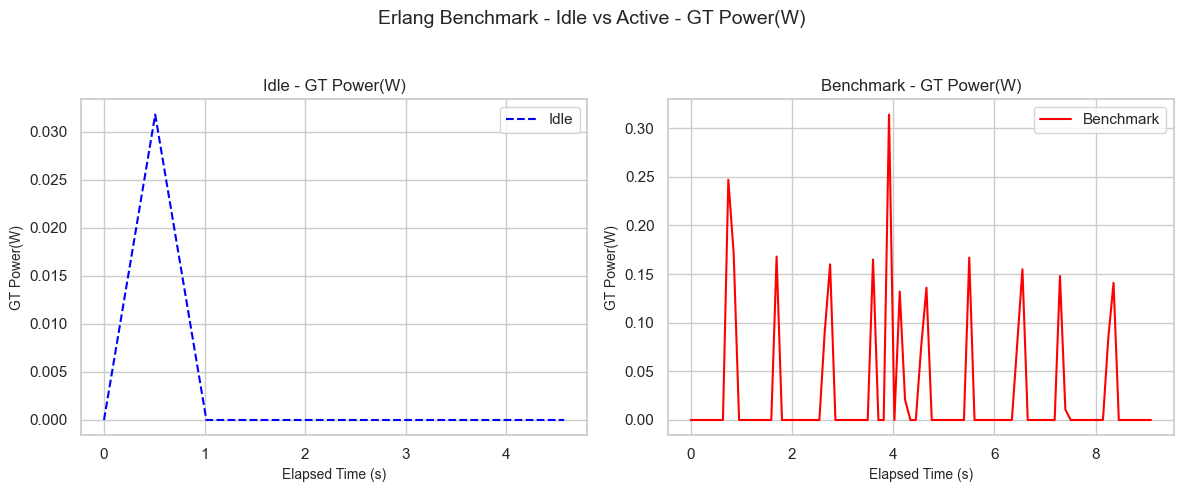

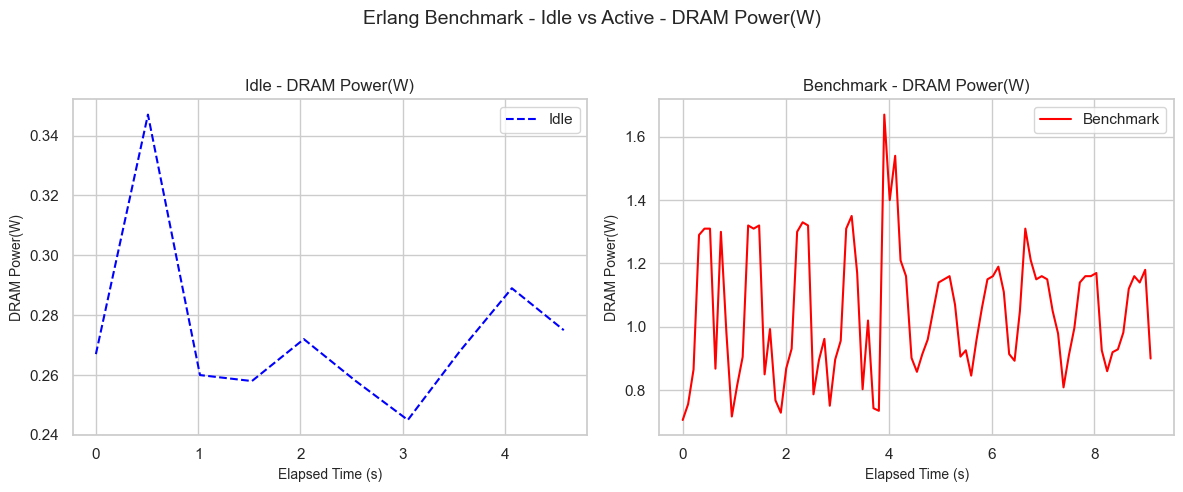

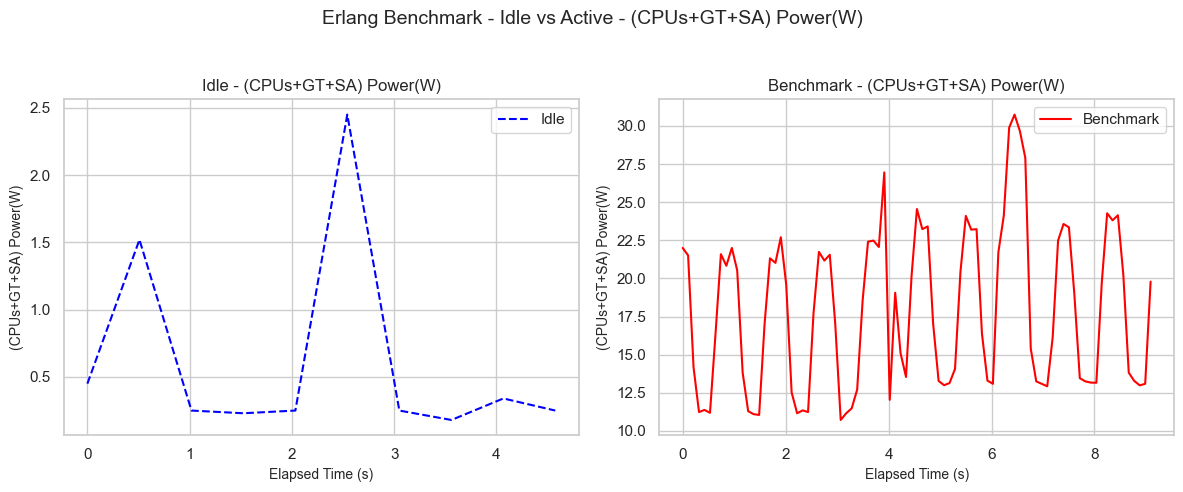

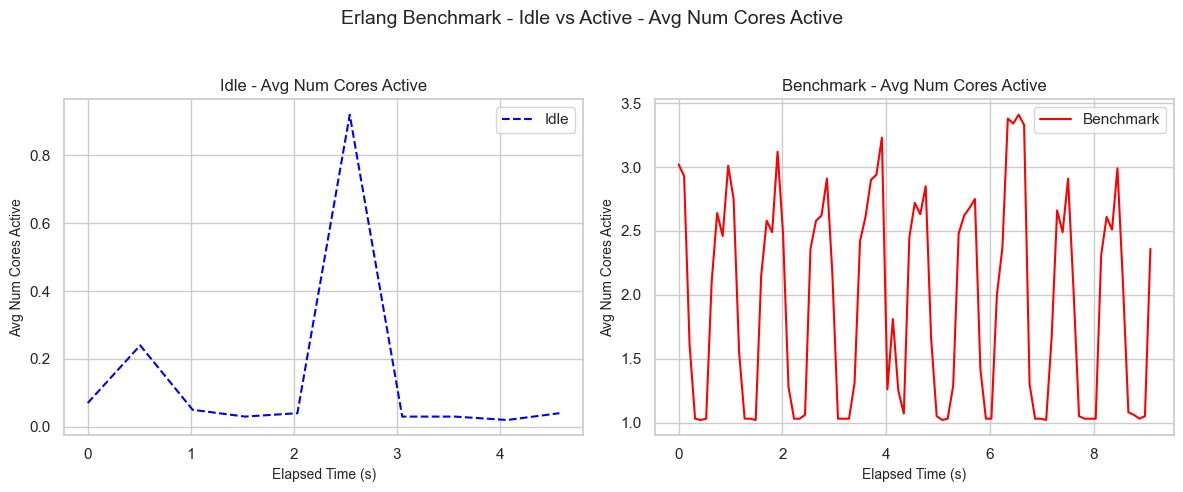

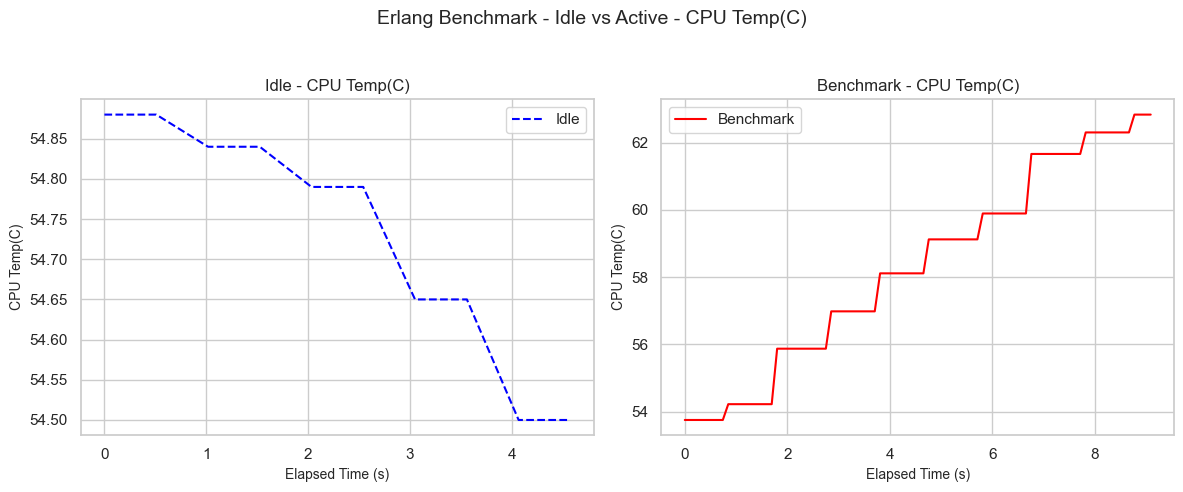

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

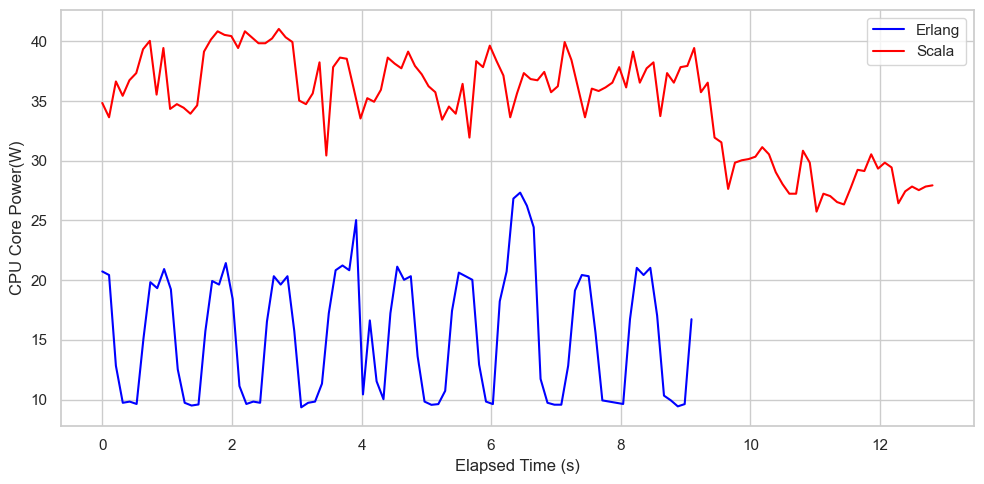

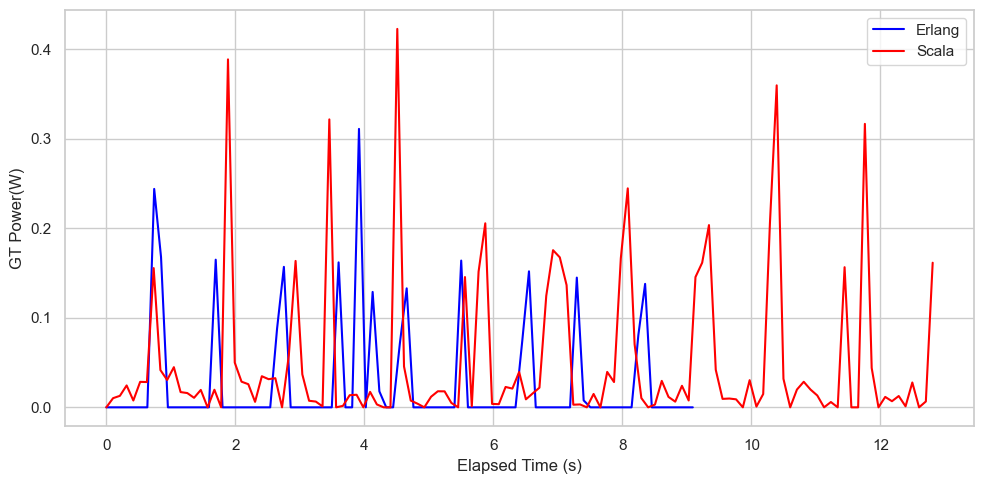

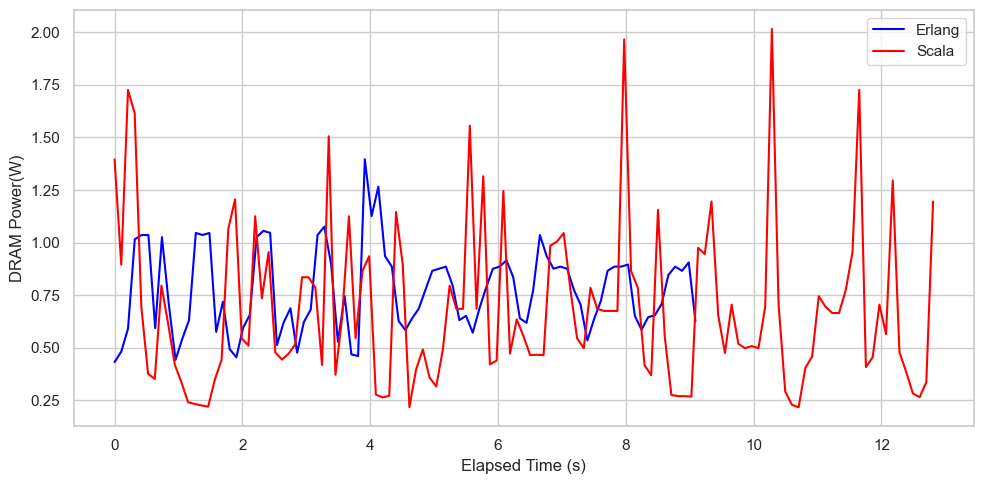

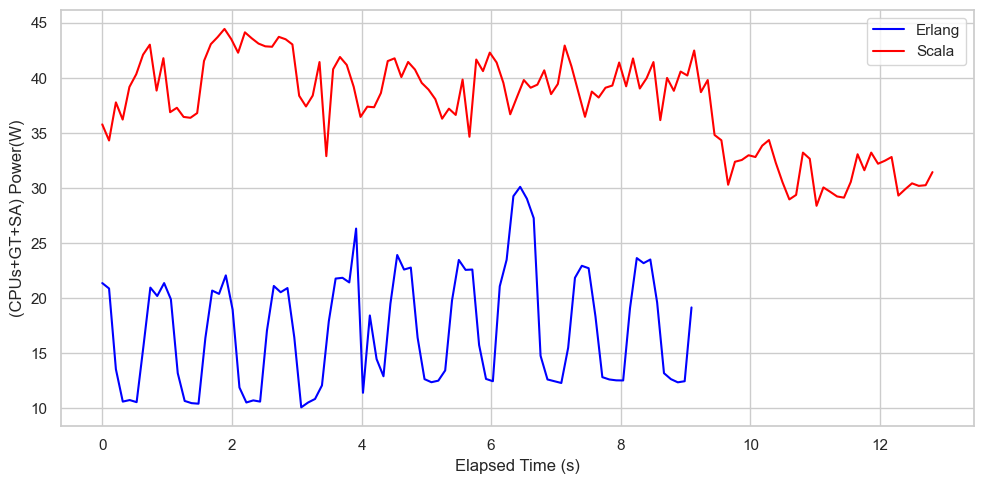

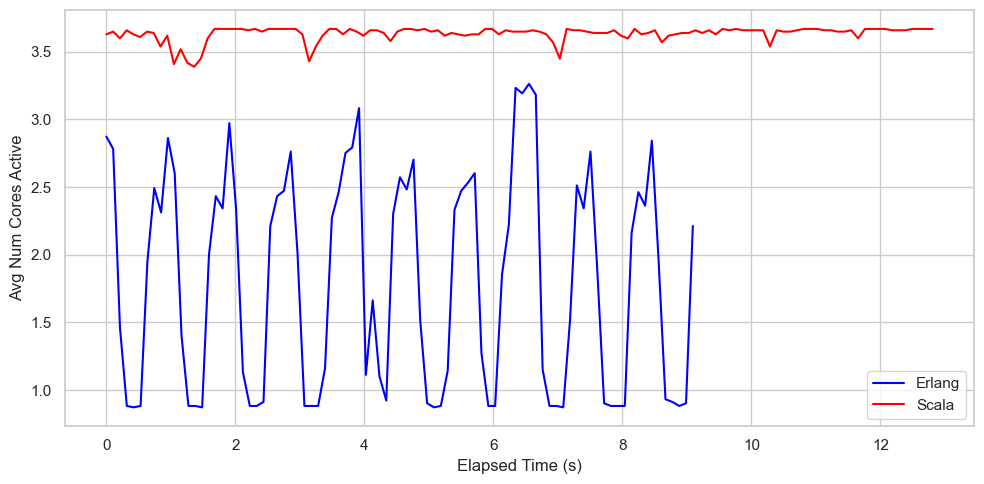

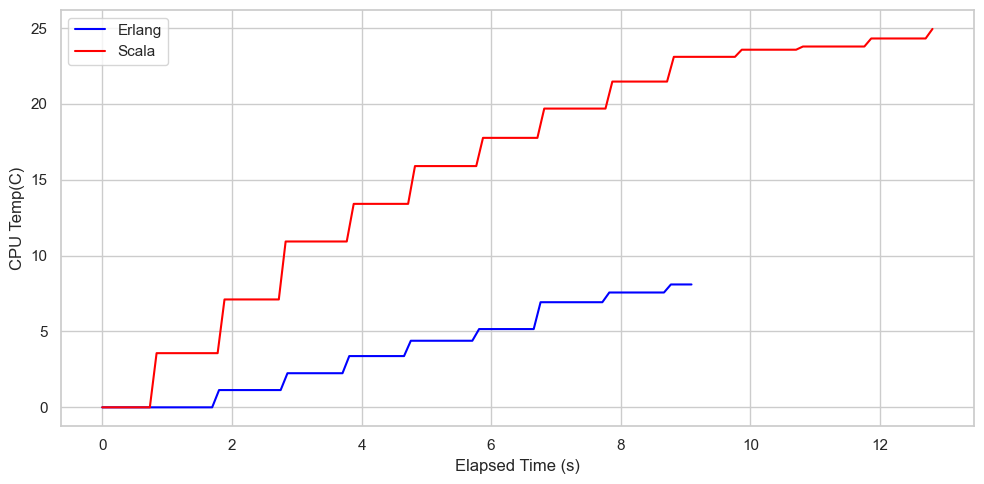

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.15870
GT Power(W)               0.04157
DRAM Power(W)             0.46450
(CPUs+GT+SA) Power(W)     1.85000
CPU Temp(C)              53.91000
Avg Num Cores Active      0.33100
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         0.36796
GT Power(W)               0.00318
DRAM Power(W)             0.27390
(CPUs+GT+SA) Power(W)     0.61700
CPU Temp(C)              54.73200
Avg Num Cores Active      0.14700
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        35.980488
GT Power(W)               0.090540
DRAM Power(W)             1.147821
(CPUs+GT+SA) Power(W)    39.405935
CPU Temp(C)              69.776911
Avg Num Cores Active      3.964715
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        15.864713
GT Power(W)               0.028313
DRAM Power(W)             1.046747
(CPUs+GT+SA) Power(W)    17.957701
CPU Temp(C)              58.291034
Avg Num Cores Active      1.952874
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [ ]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


File created and results saved to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 458.64257053869915 Joules
Erlang Benchmark: 149.6865003329701 Joules
